In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [2]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2020", "DEN")
print(data.head())
one_match = extract_one_match(data, 1)


   frame_team  Time [s]_team half_team  home_1_x  home_1_y  home_3_x  \
0           0           0.00        1H     52.49     -0.08     19.96   
1           1           0.04        1H     52.51     -0.06     19.95   
2           2           0.08        1H     52.53     -0.05     19.95   
3           3           0.12        1H     52.51     -0.06     19.94   
4           4           0.16        1H     52.51     -0.05     19.94   

   home_3_y  home_4_x  home_4_y  home_5_x  ...  away_19_y  away_22_x  \
0      0.13     21.84     10.54     18.66  ...        NaN      -0.41   
1      0.14     21.87     10.56     18.68  ...        NaN      -0.40   
2      0.15     21.89     10.57     18.70  ...        NaN      -0.34   
3      0.16     21.90     10.58     18.73  ...        NaN      -0.29   
4      0.17     21.92     10.59     18.76  ...        NaN      -0.23   

   away_22_y  away_23_x  away_23_y  away_26_x  away_26_y  ball_x  ball_y  \
0      28.75      -0.43      33.28        NaN        NaN  

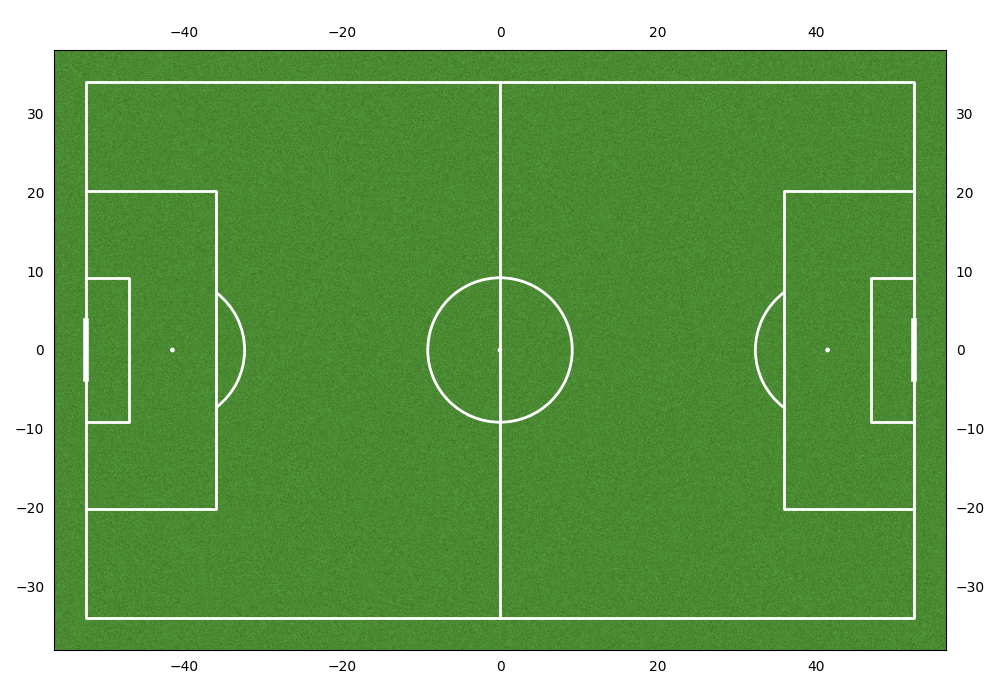

Ball placement mode enabled. Click to place the ball on the pitch.
Ball placed at: (np.float64(51.98816478221224), np.float64(33.78601358598324))
Vector drawing mode enabled. Select start and end points for the vector.
Situation saved! Total saved situations: 1
Cleared the current situation. All players are available for selection again.
Loaded Situation 1
{'home_1_x': np.float64(51.86146738592471), 'home_1_y': np.float64(33.78601358598324), 'home_2_x': np.float64(49.20082206388659), 'home_2_y': np.float64(6.4193759878768475), 'home_3_x': np.float64(49.327519460174116), 'home_3_y': np.float64(4.26552025098885), 'home_4_x': np.float64(44.006228816097874), 'home_4_y': np.float64(4.518915043563908), 'home_5_x': np.float64(50.34109863047436), 'home_5_y': np.float64(-1.8159547708125743), 'home_6_x': np.float64(47.68045330843624), 'home_6_y': np.float64(-0.6756782042248091), 'home_7_x': np.float64(44.386321004960465), 'home_7_y': np.float64(1.098085343800605), 'home_8_x': np.float64(47.80715

In [ ]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [4]:
index_displayer = None

In [5]:
if (len(interactive_pitch.vectors) < 1):
    index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [6]:
from libs.similar_movement import *
if (len(interactive_pitch.vectors) > 0):
    distance_index_list = find_similar_movement_given_vector(one_match, interactive_pitch.vectors[0] , interactive_pitch.similar_situation_indices )
else:
    distance_index_list = find_similar_movement(one_match, index_displayer.get_selected_index(), interactive_pitch.similar_situation_indices )

6441
31604
31172
31124
31220
31076
31268
31316
31364
31412
31460
31508
31556


In [7]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

In [ ]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])

In [9]:
print(distance_index_list[0][0]) 
print(distance_index_list)

418.24068069803377
[(418.24068069803377, np.int64(31604)), (447.93033914718177, np.int64(31556)), (1573.787244742149, np.int64(6441)), (1624.178164758711, np.int64(31508)), (1938.709154260694, np.int64(31268)), (1938.741262692753, np.int64(31124)), (1938.7486928173912, np.int64(31412)), (1938.761180540485, np.int64(31316)), (1938.766868243588, np.int64(31220)), (1938.7987318386297, np.int64(31076)), (1938.8029289875353, np.int64(31364)), (1938.813777547918, np.int64(31172)), (1938.8150370446317, np.int64(31460))]


In [10]:
from libs.Video_Player import *

In [11]:

initial_index = index_displayer_2.get_selected_index()  
initial_time = one_match.iloc[initial_index]['Time [s]'] 

video_player = VideoPlayer(video_path="/data/video/EURO2020Russia_vs_Denmark_1st_Half_769630.mp4", video_offset=52, distance_index_list=distance_index_list)
video_player.start(initial_time)


Initial Time: 1264.16 seconds
